In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, confusion_matrix
from imblearn.under_sampling import NearMiss

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
data = pd.read_csv('startup data.csv')

In [3]:
data.shape

(923, 49)

In [4]:
data_to_test = data.tail(100)
data_to_test.to_csv(r"C:\Users\mattv\Lilly - Data Science\Git-project-3- Startup success prediction\Cleaning\100rowstest_data_for_test", index = False)
data_to_test.index
data.drop(data_to_test.index).head()
data = data.drop(data_to_test.index)
data.shape

(823, 49)

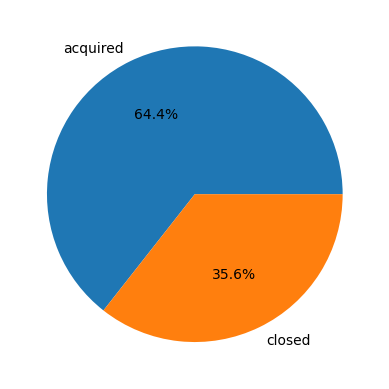

In [5]:
status_count = data['status'].value_counts()
plt.pie(status_count, labels = status_count.index, autopct = '%1.1f%%', )
plt.show()

In [6]:
# Transforming the target column to boolian

data.replace(to_replace = ['acquired','closed'],value = [1,0], inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                823 non-null    int64  
 1   state_code                823 non-null    object 
 2   latitude                  823 non-null    float64
 3   longitude                 823 non-null    float64
 4   zip_code                  823 non-null    object 
 5   id                        823 non-null    object 
 6   city                      823 non-null    object 
 7   Unnamed: 6                384 non-null    object 
 8   name                      823 non-null    object 
 9   labels                    823 non-null    int64  
 10  founded_at                823 non-null    object 
 11  closed_at                 302 non-null    object 
 12  first_funding_at          823 non-null    object 
 13  last_funding_at           823 non-null    object 
 14  age_first_

In [8]:
#data.isnull().sum()

In [9]:
data.isnull().sum().sum()

1243

In [10]:
# Checking for duplicates: 

data['id'].nunique() # so no duplicates

823

In [11]:
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,682.000000,682.000000,823.000000,823.000000,8.230000e+02,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,571.929526,38.514740,-103.387944,0.643985,2.221836,3.913024,3.063513,4.790902,7.731470,2.317132,2.634635e+07,1.839611,0.522479,0.116646,0.091130,0.044957,0.223572,0.167679,0.160389,0.082625,0.081409,0.065614,0.057108,0.029162,0.037667,0.002430,0.315917,0.319563,0.258809,0.516403,0.391252,0.228433,0.099635,2.792424,0.806804,0.643985
std,335.009983,3.669509,22.215104,0.479111,2.500585,2.991667,2.989482,3.263351,7.351255,1.394388,2.006804e+08,1.342198,0.499798,0.321194,0.287969,0.207337,0.416892,0.373808,0.367189,0.275481,0.273629,0.247756,0.232190,0.168362,0.190506,0.049266,0.465163,0.466591,0.438247,0.500035,0.488327,0.420078,0.299695,1.854997,0.395045,0.479111
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-3.882200,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,280.500000,37.389551,-122.192337,0.000000,0.580800,1.656150,1.000000,2.397300,3.000000,1.000000,3.000000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,573.000000,37.779281,-118.374037,1.000000,1.471200,3.476700,2.550650,4.475350,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000,1.000000
75%,867.500000,40.730646,-77.090212,1.000000,3.494500,5.523250,4.582225,6.786325,10.000000,3.000000,2.450527e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,1.000000
max,1153.000000,54.983201,-1.574631,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [12]:
print(data['founded_at'].describe())
print(data['founded_at'].max())

count          823
unique         204
top       1/1/2002
freq            53
Name: founded_at, dtype: object
9/9/2010


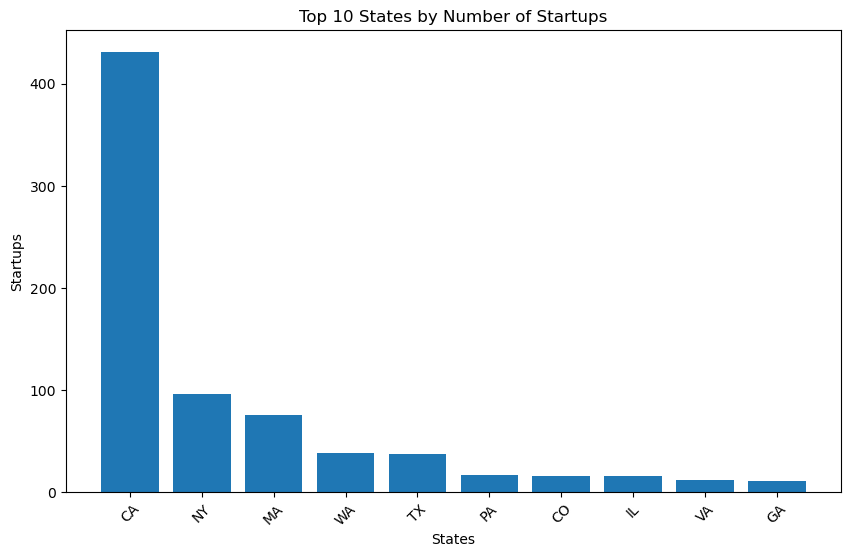

In [13]:
state_count = data['state_code'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(state_count.iloc[0:10].index, state_count.iloc[0:10].values)
plt.xlabel('States')
plt.ylabel('Startups')
plt.title('Top 10 States by Number of Startups')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [15]:
data['founded_at'].value_counts()

founded_at
1/1/2002      53
1/1/2005      49
1/1/2000      48
1/1/2006      46
1/1/2003      46
1/1/2008      44
1/1/2004      44
1/1/2007      42
1/1/2001      34
1/1/2009      31
1/1/2010      21
1/1/2011      10
6/1/2006       9
10/1/2006      8
1/1/1999       7
2/1/2010       7
6/1/2005       7
7/1/2008       6
5/1/2005       5
9/1/2007       5
8/1/2006       5
6/1/2007       5
8/1/2010       5
3/1/2011       4
5/1/2010       4
7/1/2009       4
2/1/2005       4
8/1/2009       4
10/1/2007      4
4/1/2007       4
4/1/2006       4
3/1/2010       4
7/1/2007       4
1/1/2012       4
2/1/2007       4
5/1/2006       4
5/1/2007       4
7/1/2000       3
3/1/2009       3
6/1/2010       3
11/1/2008      3
6/1/2008       3
12/1/2006      3
10/1/2005      3
4/1/2009       3
9/1/2008       3
9/1/2010       3
3/1/2007       3
8/1/2007       3
7/1/2005       3
12/1/2004      2
9/1/2006       2
6/1/2009       2
4/1/2005       2
8/1/2012       2
12/1/2005      2
1/1/1996       2
12/1/2007      2
10/

In [ ]:
category_code_count = data['category_code'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(category_code_count.iloc[0:10].index, category_code_count.iloc[0:10].values)
plt.xlabel('Categories')
plt.ylabel('Startups')
plt.title('Top 10 Categories of Startups')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
# Separate object vs numeric columns:

obj_cols = data.select_dtypes(include='object').columns.to_list()
print(obj_cols)
print(len(obj_cols))

In [ ]:
num_cols = data.select_dtypes(exclude='object').columns.to_list()
print(num_cols)
print(len(num_cols))

In [ ]:
# Creating a new dataset with the numeric columns so I can create a heatmap to investigate the correlations:

num_df = pd.DataFrame(data[num_cols])
#num_df

In [ ]:
corr = num_df.corr()
high_corr = corr[abs(corr)>0.2]
plt.figure(figsize=(10,10))
sns.heatmap(high_corr, annot = True)

In [ ]:
# From the correlation heatmap we understand that we need to drop the following columns:
# Labels is highly correlated with status, will drop
# S

In [ ]:
data['state_code'].unique()

In [ ]:
data['state_code'].nunique()

In [ ]:
# We want to see the top 3 states with the most start ups
data['state_code'].value_counts().head(3)

In [ ]:
data['category_code'].nunique()

In [ ]:
data['category_code'].unique()

In [ ]:
data['category_code'].value_counts().head(10)

In [ ]:
# We only want the top 3 states, so we are moving the Texas start ups in the otherstate column 
data['is_otherstate'] = data['is_otherstate'] + data['is_TX']


In [ ]:
# Columns too look into more   'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', : probably to make them dates
# Columns for OHE 'category_code'

In [ ]:
# OHE in category_code column, then I will also drop the 

OHE_col = ['category_code']
data = pd.get_dummies(data,columns = OHE_col)
data.replace(to_replace = [True, False],value = [1,0], inplace = True)
data.head()

In [ ]:
# Expanding the 4 columns into years and months 
data['founded_at']=pd.to_datetime(data['founded_at'])
data['funded_year']=data['founded_at'].dt.year
#data['funded_month']=data['founded_at'].dt.month
data['funded_year'].info()

data['closed_at']=pd.to_datetime(data['closed_at'])
data['closure_year']=data['closed_at'].dt.year
#data['closure_month']=data['closed_at'].dt.month
data['closure_year'].info()

data['first_funding_at']=pd.to_datetime(data['first_funding_at'])
data['first_funded_year']=data['first_funding_at'].dt.year
#data['first_funded_month']=data['first_funding_at'].dt.month

data['last_funding_at']=pd.to_datetime(data['last_funding_at'])
data['last_funded_year']=data['last_funding_at'].dt.year
#data['last_funded_month']=data['last_funding_at'].dt.month

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data[data['funded_year']>=2000], x = 'funded_year')
plt.xlabel('Year')
plt.ylabel('Number of Funded Startups')
plt.title('Number of Funded Startups per Year 2000-2013')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Fill in null values on the dates with 0, as we do not have the information:

data['closure_year'] = data['closure_year'].fillna(value=0)
#data['closure_month'] = data['closure_month'].fillna(value=0)
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value=0)
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value=0)

In [ ]:
#data.info()

In [ ]:
#data.isnull().sum()

In [ ]:
data.isnull().sum().sum()

In [ ]:
# Drop columns with no useful/important information and highly correlated columns

data.drop(['Unnamed: 0', 'Unnamed: 6' , 'zip_code', 'state_code', 'state_code.1', 'name', 'labels', 'is_TX', 'id', 'city', 'object_id', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'] , axis =1, inplace = True)

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
# Checking for any remaining null values:

data.isnull().sum().sum()

In [ ]:
corr = data.corr()
high_corr = corr[abs(corr)>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(high_corr, annot = True)

In [ ]:
data['status'].value_counts()

In [ ]:
acquired_df = pd.DataFrame(data[data['status'] == 1])

In [ ]:
acquired_df['closure_year'].unique()

In [ ]:
acquired_df['closure_year'].nunique()

In [ ]:
acquired_df['closure_year'].value_counts()

# the 0.0 mean that the start up did not close and got acquired 

In [ ]:
df = data.copy()

# New dataframe creation: We clearly can see that closure_year columns created overfitting on our data so we will create a new dataframe without this column and we will continue working with this as base going forward.

In [ ]:
data_clean = df.copy()

In [ ]:
data_clean.columns

In [ ]:
data_clean.drop('closure_year', axis =1, inplace = True)

In [ ]:
data_clean.columns

In [ ]:
df2 = data_clean.copy()

# Model Tuning 